In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps = 3
X, y = prepare_data(timeseries_data, n_steps)

In [5]:
print(X),print(y)


[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [6]:
X.shape


(6, 3)

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [8]:
X.shape

(6, 3, 1)

# Building LSTM Model

In [9]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 0s 999us/step - loss: 31709.4316
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 30962.9121
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 30209.9688
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 29471.3516
Epoch 5/300
1/1 [==============================] - 0s 999us/step - loss: 28937.7910
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 28407.9824
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 27841.2402
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 27246.0879
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 26610.0215
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 25911.5371
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 25161.3965
Epoch 12/300
1/1 [==============================] - 0s 999us/step - loss: 24372.8984
Epoch 1

1/1 [==============================] - 0s 1ms/step - loss: 15.7174
Epoch 102/300
1/1 [==============================] - 0s 8ms/step - loss: 15.5664
Epoch 103/300
1/1 [==============================] - 0s 3ms/step - loss: 15.4932
Epoch 104/300
1/1 [==============================] - 0s 7ms/step - loss: 15.4870
Epoch 105/300
1/1 [==============================] - 0s 2ms/step - loss: 15.5302
Epoch 106/300
1/1 [==============================] - 0s 5ms/step - loss: 15.6012
Epoch 107/300
1/1 [==============================] - 0s 2ms/step - loss: 15.6788
Epoch 108/300
1/1 [==============================] - 0s 2ms/step - loss: 15.7449
Epoch 109/300
1/1 [==============================] - 0s 7ms/step - loss: 15.7867
Epoch 110/300
1/1 [==============================] - 0s 8ms/step - loss: 15.7975
Epoch 111/300
1/1 [==============================] - 0s 2ms/step - loss: 15.7768
Epoch 112/300
1/1 [==============================] - 0s 999us/step - loss: 15.7289
Epoch 113/300
1/1 [=====================

1/1 [==============================] - 0s 1000us/step - loss: 9.5791
Epoch 201/300
1/1 [==============================] - 0s 2ms/step - loss: 10.5501
Epoch 202/300
1/1 [==============================] - 0s 999us/step - loss: 10.4830
Epoch 203/300
1/1 [==============================] - 0s 997us/step - loss: 9.6572
Epoch 204/300
1/1 [==============================] - 0s 0s/step - loss: 8.5560
Epoch 205/300
1/1 [==============================] - 0s 999us/step - loss: 8.0752
Epoch 206/300
1/1 [==============================] - 0s 997us/step - loss: 9.1548
Epoch 207/300
1/1 [==============================] - 0s 3ms/step - loss: 9.3541
Epoch 208/300
1/1 [==============================] - 0s 1ms/step - loss: 8.1394
Epoch 209/300
1/1 [==============================] - 0s 1ms/step - loss: 7.9460
Epoch 210/300
1/1 [==============================] - 0s 3ms/step - loss: 8.3589
Epoch 211/300
1/1 [==============================] - 0s 2ms/step - loss: 8.5769
Epoch 212/300
1/1 [=======================

# Predicting For the next 10 data

In [13]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        
        x_input = x_input.reshape((1, n_steps, n_features))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[226.50774]
1 day input [196.         210.         226.50773621]
1 day output [[238.86664]]
2 day input [210.         226.50773621 238.86663818]
2 day output [[254.85455]]
3 day input [226.50774 238.86664 254.85455]
3 day output [[271.48837]]
4 day input [238.86664 254.85455 271.48837]
4 day output [[287.00113]]
5 day input [254.85455 271.48837 287.00113]
5 day output [[304.85364]]
6 day input [271.48837 287.00113 304.85364]
6 day output [[323.07523]]
7 day input [287.00113 304.85364 323.07523]
7 day output [[341.61746]]
8 day input [304.85364 323.07523 341.61746]
8 day output [[361.7609]]
9 day input [323.07523 341.61746 361.7609 ]
9 day output [[382.53937]]
[226.50774, 238.86664, 254.85455, 271.48837, 287.00113, 304.85364, 323.07523, 341.61746, 361.7609, 382.53937]


In [14]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [15]:
len(timeseries_data)

9

In [16]:
lst_output

[226.50774,
 238.86664,
 254.85455,
 271.48837,
 287.00113,
 304.85364,
 323.07523,
 341.61746,
 361.7609,
 382.53937]

# Visualizaing The Output

In [18]:
import matplotlib.pyplot as plt

In [19]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

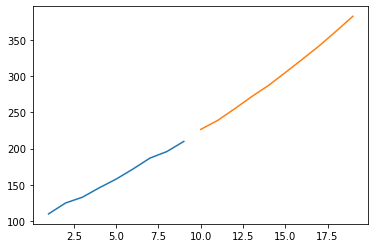

In [20]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)